# Customer Segmentation

In [1]:
#Importing liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.float_format', '{:.2f}'.format)

## Reading the File

In [2]:
#importing the file into the dataframe
retail_df = pd.read_csv("Champo Carpets V1.csv")
retail_df.head(5)

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.50,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


In [3]:
#checking the size of the matrix
retail_df.shape

(13135, 13)

In [4]:
#checking for information of the DF, we will get to know if any data is missing or not.
retail_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderiD           13135 non-null  int64  
 1   Item_Id           13135 non-null  int64  
 2   CustomerCode      13135 non-null  object 
 3   CountryName       13135 non-null  object 
 4   customer_country  13135 non-null  object 
 5   QtyRequired       13135 non-null  int64  
 6   TotalArea         13135 non-null  float64
 7   Amount            13135 non-null  float64
 8   ITEM_NAME         13135 non-null  object 
 9   QualityName       13135 non-null  object 
 10  DesignName        13135 non-null  object 
 11  ColorName         13135 non-null  object 
 12  ShapeName         13135 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


In [5]:
#checking the Value counts of counties 
retail_df.CountryName.value_counts()

CountryName
USA             9196
UK              1491
ITALY            551
ROMANIYA         436
AUSTRALIA        301
CANADA           273
BELGIUM          214
INDIA            194
LEBENON          168
BRAZIL           160
SOUTH AFRICA      84
CHINA             57
ISRAEL             8
UAE                2
Name: count, dtype: int64

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderiD           13135 non-null  int64  
 1   Item_Id           13135 non-null  int64  
 2   CustomerCode      13135 non-null  object 
 3   CountryName       13135 non-null  object 
 4   customer_country  13135 non-null  object 
 5   QtyRequired       13135 non-null  int64  
 6   TotalArea         13135 non-null  float64
 7   Amount            13135 non-null  float64
 8   ITEM_NAME         13135 non-null  object 
 9   QualityName       13135 non-null  object 
 10  DesignName        13135 non-null  object 
 11  ColorName         13135 non-null  object 
 12  ShapeName         13135 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


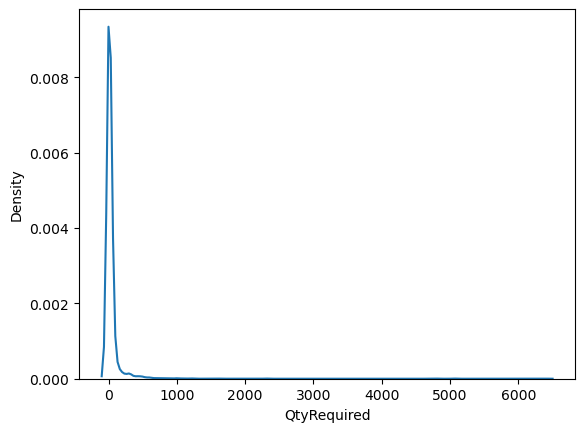

In [7]:
sn.kdeplot(retail_df.QtyRequired);

## Exploratory Analysis

### Checking Relationship between total sales vs countries. 
We clearly see that USA is leading in total sales followed by UK, but the gap is big.

#### Finding totals


In [8]:
#Checking the Country wise sales distribution.
retail_df.groupby('CountryName')['Amount'].sum()

CountryName
AUSTRALIA        356938.86
BELGIUM          426791.41
BRAZIL            59877.27
CANADA           116778.30
CHINA             24919.96
INDIA            147574.00
ISRAEL            17128.88
ITALY            563098.85
LEBENON           56742.73
ROMANIYA         426626.05
SOUTH AFRICA     130457.99
UAE               44234.00
UK              1965411.23
USA            27082868.03
Name: Amount, dtype: float64

#### Bar Chart


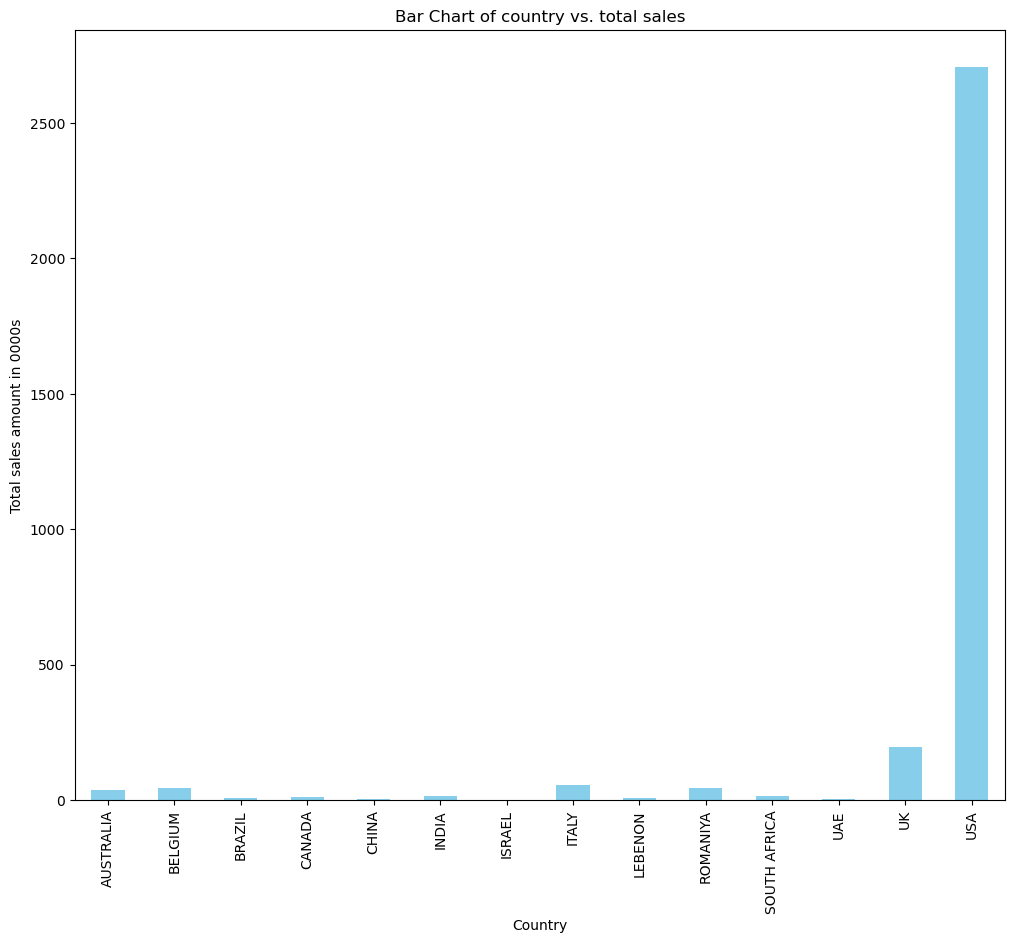

In [9]:
#plotting Total sales per country
plt.figure(figsize=(12, 10))  

(retail_df.groupby('CountryName')['Amount'].sum()/10000).plot(kind='bar', color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total sales amount in 0000s')
plt.title('Bar Chart of country vs. total sales')


plt.show()

### Checking speread of amounts by item name
We can clearly see that onekind of item is generating most sales

In [10]:
retail_df.head(10)

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.50,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC
5,1,34,H-1,USA,H-1USA,6,71.25,427.50,HAND TUFTED,TUFTED 60C,GOVERNOR [9014],BROWN,REC
6,1,19,H-1,USA,H-1USA,35,11.25,393.75,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],SAGE/GREEN,REC
7,1,4,H-1,USA,H-1USA,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC
8,1,29,H-1,USA,H-1USA,4,88.00,352.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC
9,1,28,H-1,USA,H-1USA,7,40.00,280.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


#### Histogram


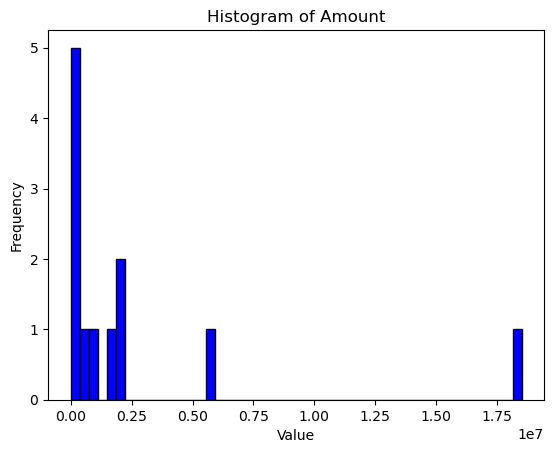

In [11]:
#Plotting histogram to check distribution
plt.hist(retail_df.groupby('ITEM_NAME')['Amount'].sum(), bins=50, color='blue', edgecolor='black')

plt.title('Histogram of Amount')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

### Checking Relationship between total sales vs Item names. 
From the histogram we dont see clear details , we will dig more into which items are performing high.

We clearly see that "Hand-Tuffed"  is leading in total sales followed by "DURRY"

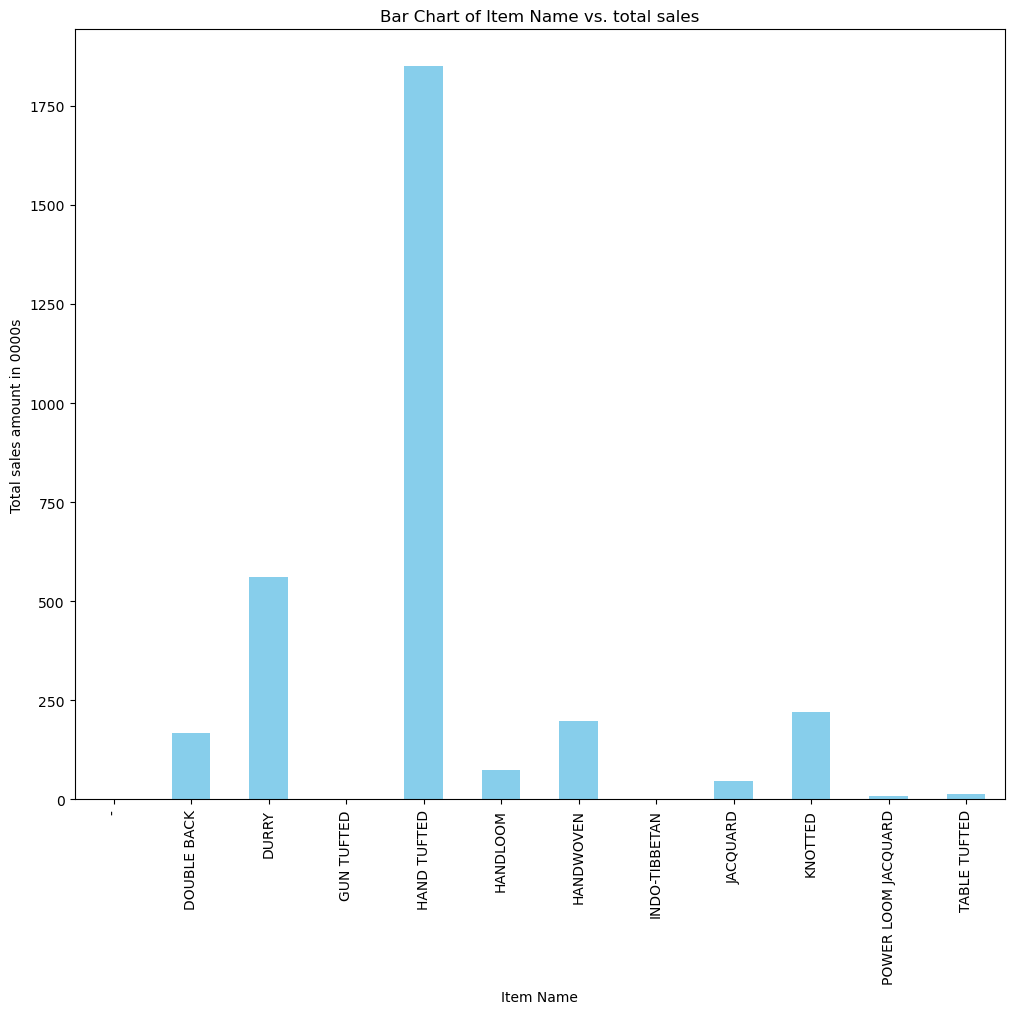

In [12]:
#plotting bar for the item name vs sales
plt.figure(figsize=(12, 10))  

(retail_df.groupby('ITEM_NAME')['Amount'].sum()/10000).plot(kind='bar', color='skyblue')

plt.xlabel('Item Name')
plt.ylabel('Total sales amount in 0000s')
plt.title('Bar Chart of Item Name vs. total sales')

plt.show()

## Calculating Frequency, Monetary and new Measures 


In [13]:
from dateutil.relativedelta import relativedelta

In [14]:
#Checking spread of totalArea column
retail_df['TotalArea'].describe()

count   13135.00
mean       44.73
std        50.10
min         0.04
25%         5.80
50%        24.00
75%        80.00
max      1024.00
Name: TotalArea, dtype: float64

### Number of Unique Items: Creating a new measure  for calculating "Customer Trust"

Idea is that we can determine how many different products is a single customer buying from us , which reflects the trust of the customer in our shop/platform

In [15]:
nitems_df = retail_df.groupby([ 'CustomerCode'])['Item_Id'].nunique().reset_index() 
nitems_df.columns = ['CustomerCode', 'uniqueItems']
nitems_df.head(10)

,CustomerCode,uniqueItems
0,A-11,23
1,A-6,25
2,A-9,504
3,B-2,44
4,B-3,72
5,B-4,75
6,C-1,472
7,C-2,37
8,C-3,85
9,CC,179


### Frequency dataframe


In [16]:
frequency_df = retail_df.groupby(['CustomerCode'])['OrderiD'].count().reset_index()
frequency_df.columns = ['CustomerCode', 'frequency']
frequency_df.head(10)

,CustomerCode,frequency
0,A-11,40
1,A-6,25
2,A-9,1173
3,B-2,47
4,B-3,72
5,B-4,75
6,C-1,1058
7,C-2,232
8,C-3,87
9,CC,194


### Monetary dataframe -> mvalue

In [17]:
mvalue_df = retail_df.groupby(['CustomerCode'])['Amount'].sum().reset_index()
mvalue_df.columns = ['CustomerCode', 'mvalue']
mvalue_df.head(10)

,CustomerCode,mvalue
0,A-11,185404.10
1,A-6,6247.46
2,A-9,1592079.79
3,B-2,14811.16
4,B-3,58626.86
5,B-4,26242.50
6,C-1,567620.72
7,C-2,1557123.00
8,C-3,99062.35
9,CC,147574.00


### Merging all the 4 measures , frequency, Monetary, Trust and variety- into RFM dataframe

In [18]:
rfm_df = frequency_df.merge(mvalue_df, 
                            on = 'CustomerCode').merge(nitems_df, on = 'CustomerCode')

In [19]:
rfm_df.head(10)

,CustomerCode,frequency,mvalue,uniqueItems
0,A-11,40,185404.10,23
1,A-6,25,6247.46,25
2,A-9,1173,1592079.79,504
3,B-2,47,14811.16,44
4,B-3,72,58626.86,72
5,B-4,75,26242.50,75
6,C-1,1058,567620.72,472
7,C-2,232,1557123.00,37
8,C-3,87,99062.35,85
9,CC,194,147574.00,179


## Exploring the measures and relationships 

### Scatter for frequency vs monetary

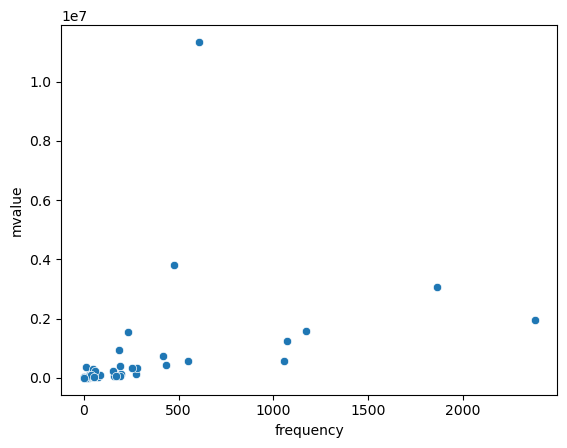

In [20]:
sn.scatterplot(data = rfm_df,
               x = 'frequency',
               y = 'mvalue');

### Describing all 4 measures

this would help in binning for low an dhigh values

In [21]:
rfm_df['frequency'].describe()

count     45.00
mean     291.89
std      494.22
min        1.00
25%       30.00
50%       75.00
75%      273.00
max     2380.00
Name: frequency, dtype: float64

In [22]:
np.set_printoptions(suppress=True)

In [23]:
percentiles = [0, 33, 66, 100]
freq_cut_points = np.percentile(rfm_df['frequency'], percentiles)
freq_cut_points

array([   1.  ,   44.08,  193.04, 2380.  ])

In [24]:
rfm_df['mvalue'].describe()

count         45.00
mean      698209.95
std      1808976.96
min          328.88
25%        39701.24
50%       116778.30
75%       426626.05
max     11341052.51
Name: mvalue, dtype: float64

In [25]:
percentiles = [0, 33, 66, 100]
mval_cut_points = np.percentile(rfm_df['mvalue'], percentiles)
mval_cut_points

array([     328.8752 ,    57722.4802 ,   328528.92655, 11341052.51334])

In [26]:
rfm_df['uniqueItems'].describe()

count    45.00
mean    132.93
std     172.51
min       1.00
25%      18.00
50%      72.00
75%     168.00
max     774.00
Name: uniqueItems, dtype: float64

In [27]:
percentiles = [0, 33, 66, 100]
nunique_cut_points = np.percentile(rfm_df['uniqueItems'], percentiles)
nunique_cut_points

array([  1.  ,  29.  , 132.28, 774.  ])

### Binning all 4 measures into 'High', 'medium' , 'low' 

In [28]:
rfm_df['f_bin'] = pd.cut( rfm_df['frequency'], 
                         bins = freq_cut_points, 
                         labels = ['Low', 'Medium', 'High'])
rfm_df['m_bin'] = pd.cut( rfm_df['mvalue'], 
                         bins = mval_cut_points, \
                         labels =['Low', 'Medium','High'])
rfm_df['u_bin'] = pd.cut( rfm_df['uniqueItems'],
                               bins = nunique_cut_points, 
                               labels =['Low', 'Medium', 'High'])

In [29]:
rfm_df


,CustomerCode,frequency,mvalue,uniqueItems,f_bin,m_bin,u_bin
0,A-11,40,185404.10,23,Low,Medium,Low
1,A-6,25,6247.46,25,Low,Low,Low
2,A-9,1173,1592079.79,504,High,High,High
3,B-2,47,14811.16,44,Medium,Low,Medium
4,B-3,72,58626.86,72,Medium,Medium,Medium
5,B-4,75,26242.50,75,Medium,Low,Medium
6,C-1,1058,567620.72,472,High,High,High
7,C-2,232,1557123.00,37,High,High,Medium
8,C-3,87,99062.35,85,Medium,Medium,Medium
9,CC,194,147574.00,179,High,Medium,High


### Creating Heatmap for Frequency and Monetary

In [30]:
rfm_segments = pd.crosstab(rfm_df.m_bin,
                           rfm_df.u_bin,
                           normalize = "all")

In [31]:
rfm_segments = rfm_segments.reindex(['High', 
                                     'Medium', 
                                     'Low'])
rfm_segments

u_bin,Low,Medium,High
m_bin,,,
High,0.02,0.09,0.23
Medium,0.12,0.14,0.09
Low,0.19,0.09,0.02


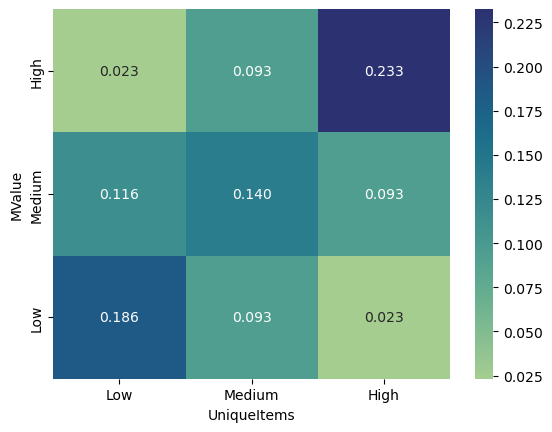

In [32]:
#heatmap for frequency and monetary
sn.heatmap(rfm_segments[['Low', 'Medium', 'High']],
           annot = True,
           fmt = "0.3f",
           cmap = "crest");
plt.xlabel("UniqueItems")
plt.ylabel("MValue");

### Checking KDE and boxplot plots for value distributions

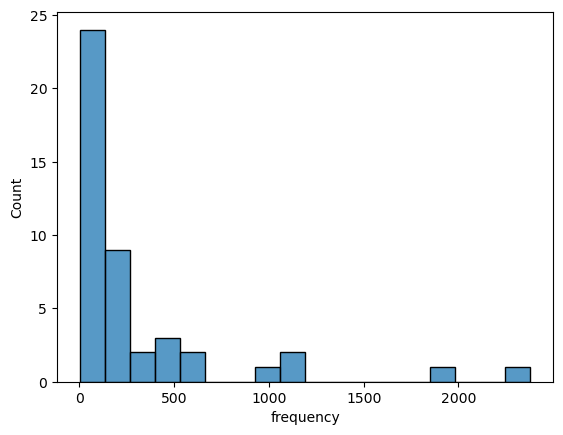

In [33]:
sn.histplot(rfm_df.frequency);

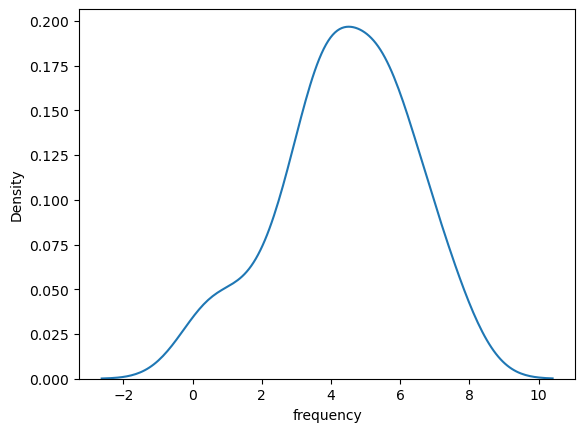

In [34]:
sn.kdeplot(np.log(rfm_df.frequency));

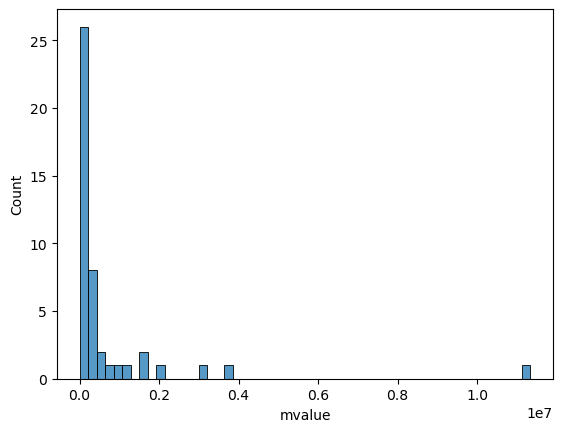

In [35]:
sn.histplot(rfm_df.mvalue);

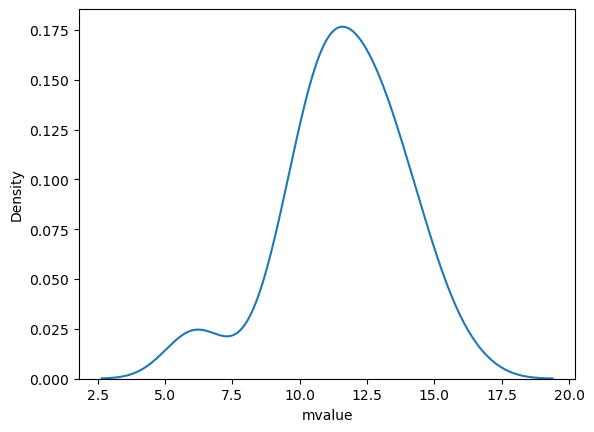

In [36]:
sn.kdeplot(np.log(rfm_df.mvalue));

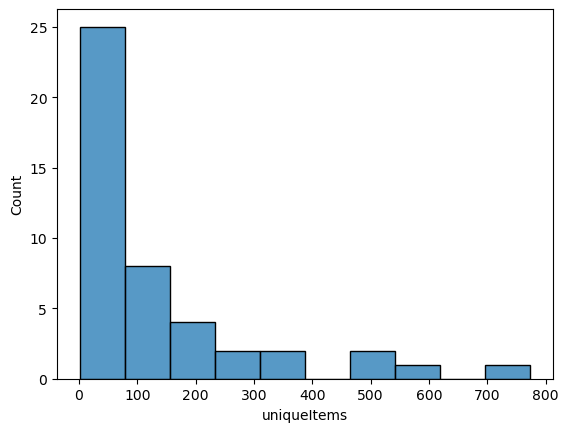

In [37]:
sn.histplot(rfm_df.uniqueItems);

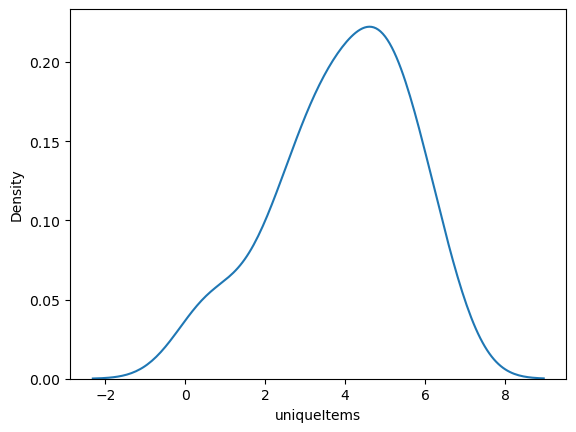

In [38]:
sn.kdeplot(np.log(rfm_df.uniqueItems));

## Clustering

### Creating log computes, as the values are very sparse

In [39]:
rfm_df.frequency.describe()

count     45.00
mean     291.89
std      494.22
min        1.00
25%       30.00
50%       75.00
75%      273.00
max     2380.00
Name: frequency, dtype: float64

### Scaling the log columns to form clusters

In [40]:
rfm_df['log_frequency'] = np.log(rfm_df['frequency'])
rfm_df['log_mvalue'] = np.log(rfm_df['mvalue'])
rfm_df['log_uniqueItems'] = np.log(rfm_df['uniqueItems'])

In [41]:
# #Using Min Max scaler to log columns
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = StandardScaler()
# scaled_rfm = scaler.fit_transform( rfm_df[['frequency',
#                                            'mvalue',
#                                            'uniqueItems']] )

In [42]:
# #Using Min Max scaler to log columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
scaled_rfm = scaler.fit_transform( rfm_df[['log_frequency',
                                           'log_mvalue',
                                           'log_uniqueItems']] )

In [43]:
#checking scaled columns
scaled_rfm[0:10]

array([[-0.3791498 ,  0.22228068, -0.48697482],
       [-0.63238836, -1.3062135 , -0.43594503],
       [ 1.44115823,  1.19169256,  1.40232857],
       [-0.29225832, -0.91705007, -0.0899713 ],
       [-0.06244959, -0.29678581,  0.21142577],
       [-0.04045465, -0.65917275,  0.23640896],
       [ 1.38556243,  0.72672703,  1.36218284],
       [ 0.56798631,  1.18168343, -0.19601411],
       [ 0.03951424, -0.06029742,  0.31300917],
       [ 0.47160596,  0.11939652,  0.76878893]])

### K-Means Clustering

In [44]:
from sklearn.cluster import KMeans

#### Elbow method

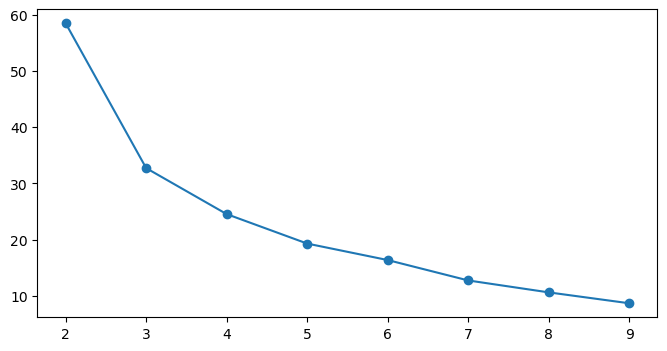

In [45]:
#Running Elbow to check number of clusters
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_rfm )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(8,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

#### Silhouette score for number of cluesters 4,5,6,7

We can see the K=5 is the best , no negative values, 0.3 score

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

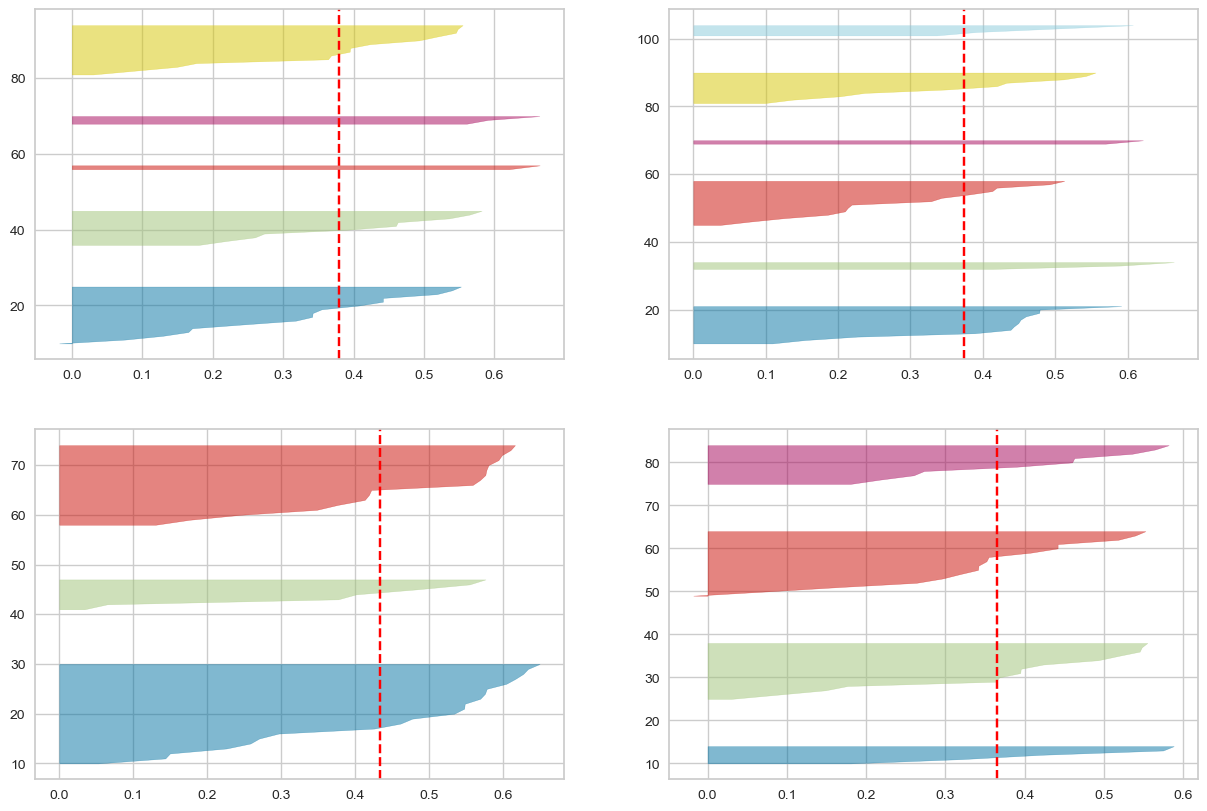

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,10))
num_clusters = [3, 4, 5, 6]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(scaled_rfm)

#### Forming Clusters: Running K-Means with K=5

In [48]:
k = 6

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_rfm )
rfm_df["clusterid"] = clusters.labels_

In [49]:
rfm_df.sample(10)

,CustomerCode,frequency,mvalue,uniqueItems,f_bin,m_bin,u_bin,log_frequency,log_mvalue,log_uniqueItems,clusterid
24,L-3,28,90756.75,14,Low,Medium,Low,3.33,11.42,2.64,0
0,A-11,40,185404.10,23,Low,Medium,Low,3.69,12.13,3.14,2
1,A-6,25,6247.46,25,Low,Low,Low,3.22,8.74,3.22,0
30,P-4,50,292544.45,29,Medium,Medium,Low,3.91,12.59,3.37,2
6,C-1,1058,567620.72,472,High,High,High,6.96,13.25,6.16,1
35,RC,255,328290.75,174,High,Medium,High,5.54,12.70,5.16,4
33,PD,190,404528.95,149,Medium,High,High,5.25,12.91,5.00,4
29,N-1,184,949375.68,132,Medium,High,Medium,5.21,13.76,4.88,4
10,CTS,8,23800.00,8,Low,Low,Low,2.08,10.08,2.08,0
41,T-6,40,101488.00,32,Low,Medium,Medium,3.69,11.53,3.47,2


In [50]:
rfm_df.clusterid.value_counts()

clusterid
2    12
4    11
1    10
0     7
3     3
5     2
Name: count, dtype: int64

### Evaluating Clusters

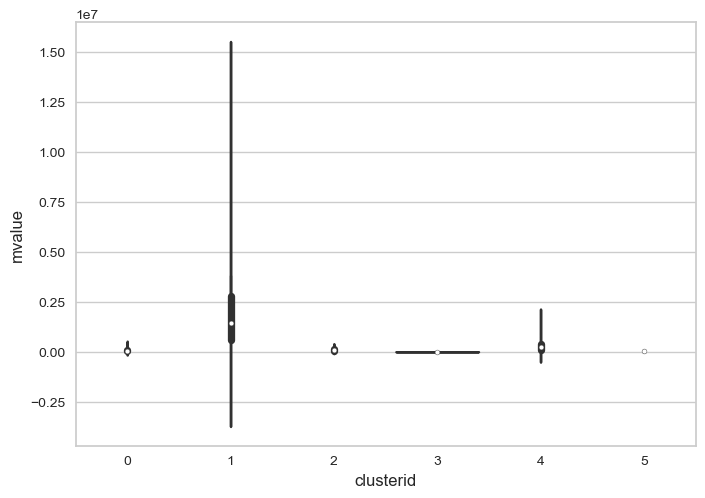

In [51]:
sn.violinplot(data = rfm_df,
           x = 'clusterid',
           y = 'mvalue',
           errorbar = None);

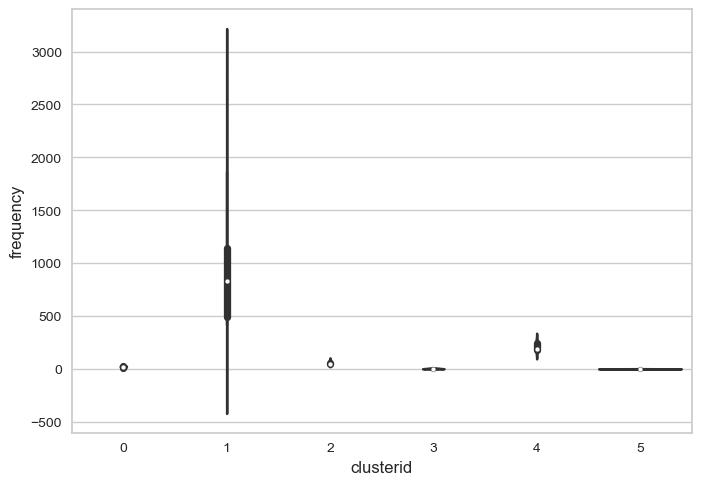

In [52]:
sn.violinplot(data = rfm_df,
           x = 'clusterid',
           y = 'frequency',
           errorbar = None);

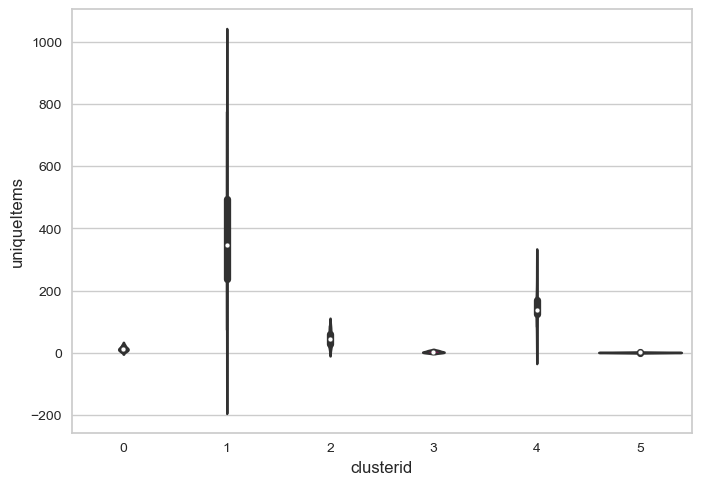

In [53]:
sn.violinplot(data = rfm_df,
           x = 'clusterid',
           y = 'uniqueItems',
           errorbar = None);

### Clusters Interpretation

#### Checking the values of each column 
they are very sparse, we will have to scale

In [54]:
rfm_df_clusters = rfm_df[['frequency', 
                          'mvalue',
                          'uniqueItems', 
                          'clusterid']].groupby("clusterid").mean().reset_index()
rfm_df_clusters

,clusterid,frequency,mvalue,uniqueItems
0,0,19.57,81810.64,13.29
1,1,1003.60,2528700.27,375.10
2,2,55.42,104114.11,46.00
3,3,3.67,499.28,3.67
4,4,207.55,386169.93,142.91
5,5,1.50,30517.00,1.50


## Segmentation Interpretation:

- Cluster 0: Bulk Buyers with Low Frequency: these customers can be converted to star customers if their frequency increases , these customers buy variety of products and quantity is high.

- Cluster 1: Star Customers: Buy high value items, they buy many unique items and also the frequency is high, these are frequent buyers of diverse items.

- Cluster 2: Dormant Customers/ Low Engagement Customers: NO Frequency , No value and no items bought. 

- Cluster 3: Needs Attention: These customers buy single type of items, dont buy variety , the monetary value is low and frequency is low.
             Marketing campaigns can be targetted to make them buy new products.

- Cluster 4: Loyal customers: They buy variety and unique product, average moneitary spends , average frequency.

In [55]:
#importing the file into the dataframe
retail_df = pd.read_csv("Champo Carpets V1.csv")
retail_df.head(5)

,OrderiD,Item_Id,CustomerCode,CountryName,customer_country,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName
0,1,5,H-1,USA,H-1USA,6,128.25,769.50,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC
1,1,26,H-1,USA,H-1USA,6,117.00,702.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC
2,1,17,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC
3,1,496,H-1,USA,H-1USA,7,88.00,616.00,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC
4,1,30,H-1,USA,H-1USA,5,117.00,585.00,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC


In [56]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderiD           13135 non-null  int64  
 1   Item_Id           13135 non-null  int64  
 2   CustomerCode      13135 non-null  object 
 3   CountryName       13135 non-null  object 
 4   customer_country  13135 non-null  object 
 5   QtyRequired       13135 non-null  int64  
 6   TotalArea         13135 non-null  float64
 7   Amount            13135 non-null  float64
 8   ITEM_NAME         13135 non-null  object 
 9   QualityName       13135 non-null  object 
 10  DesignName        13135 non-null  object 
 11  ColorName         13135 non-null  object 
 12  ShapeName         13135 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.3+ MB


In [57]:
retail_df.ITEM_NAME.unique()

array(['HAND TUFTED', 'HANDWOVEN', 'DURRY', '-', 'GUN TUFTED',
       'INDO-TIBBETAN', 'DOUBLE BACK', 'JACQUARD', 'KNOTTED', 'HANDLOOM',
       'POWER LOOM JACQUARD', 'TABLE TUFTED'], dtype=object)

In [58]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Assuming your dataset is in a DataFrame called `df`
# Step 0: Drop rows where ITEM_NAME is '-'
df_clean = retail_df[retail_df['ITEM_NAME'] != '-']

# Step 1: Create a binary matrix (customers x item types)
binary_matrix = pd.crosstab(df_clean['CustomerCode'], df_clean['ITEM_NAME'])
# Ensure binary values (0/1 only)
binary_matrix = (binary_matrix > 0).astype(int)
binary_matrix[0:10]

ITEM_NAME,DOUBLE BACK,DURRY,GUN TUFTED,HAND TUFTED,HANDLOOM,HANDWOVEN,INDO-TIBBETAN,JACQUARD,KNOTTED,POWER LOOM JACQUARD,TABLE TUFTED
CustomerCode,,,,,,,,,,,
A-11,0,1,0,0,1,0,0,0,0,0,0
A-6,1,0,0,0,0,0,0,1,0,0,0
A-9,1,1,0,1,0,1,0,1,1,0,0
B-2,0,1,0,0,0,1,0,1,0,0,0
B-3,1,0,0,0,0,0,0,1,0,0,0
B-4,0,1,0,1,1,0,0,0,0,0,0
C-1,0,1,0,1,0,1,0,0,1,0,0
C-2,0,1,0,1,0,1,0,0,0,0,0
C-3,0,1,0,1,0,0,0,0,0,0,0


In [60]:
# Step 2: Create a binary (0/1) matrix: rows = CustomerCode, columns = ITEM_NAME
binary_matrix = pd.crosstab(df_clean['CustomerCode'], df_clean['ITEM_NAME'])

# Step 3: Compute Jaccard distance (1 - Jaccard similarity)
# pdist gives a condensed distance matrix
jaccard_dist = pdist(binary_matrix.values, metric='dice')

# Convert to squareform distance matrix for AgglomerativeClustering
jaccard_dist_square = squareform(jaccard_dist)

# Step 4: Agglomerative Clustering with precomputed distance
n_clusters = 5  # you can choose based on dendrogram or silhouette
model = AgglomerativeClustering(
    affinity='precomputed',
    linkage='complete',  # recommended with Jaccard
    n_clusters=4
)

labels = model.fit_predict(jaccard_dist_square)

# Step 5: Attach cluster labels back to customers
customer_clusters = pd.DataFrame({
    'CustomerCode': binary_matrix.index,
    'Cluster': labels
})

In [61]:
customer_clusters.Cluster.value_counts()

Cluster
0    23
3    10
1     7
2     5
Name: count, dtype: int64

In [62]:
# Step 1: Merge clusters with item purchase binary matrix
merged = customer_clusters.set_index('CustomerCode').join((binary_matrix > 0).astype(int))

# Step 2: Group by Cluster and compute average purchase (proportion of customers buying each item)
cluster_item_stats = merged.groupby('Cluster').sum()

# Step 3: For each cluster, sort items by popularity
for cluster_id in cluster_item_stats.index:
    print(f"\nTop items for Cluster {cluster_id}:")
    top_items = cluster_item_stats.loc[cluster_id].sort_values(ascending=False)
    print(top_items[top_items > 0])  # optional filter to skip items with 0 frequency


Top items for Cluster 0:
HAND TUFTED            23
DURRY                  18
HANDWOVEN              15
DOUBLE BACK            10
JACQUARD               10
HANDLOOM                7
KNOTTED                 7
GUN TUFTED              4
INDO-TIBBETAN           1
POWER LOOM JACQUARD     1
TABLE TUFTED            1
Name: 0, dtype: int64

Top items for Cluster 1:
DOUBLE BACK    7
JACQUARD       4
HAND TUFTED    3
DURRY          1
HANDWOVEN      1
KNOTTED        1
Name: 1, dtype: int64

Top items for Cluster 2:
HANDWOVEN        5
DURRY            4
JACQUARD         4
KNOTTED          3
DOUBLE BACK      2
HAND TUFTED      1
HANDLOOM         1
INDO-TIBBETAN    1
Name: 2, dtype: int64

Top items for Cluster 3:
DURRY          10
HANDLOOM        3
HAND TUFTED     2
KNOTTED         2
Name: 3, dtype: int64
